In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train.isnull().head()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False

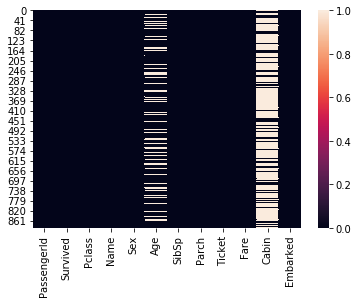

In [9]:
sns.heatmap(train.isnull())

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [14]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


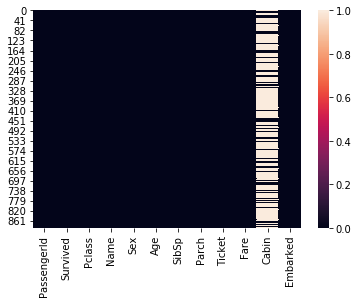

In [16]:
sns.heatmap(train.isnull())

In [17]:
train.drop('Cabin',axis =1,inplace=True)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


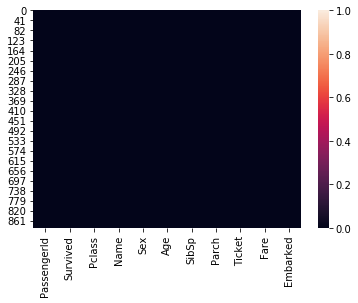

In [20]:
sns.heatmap(train.isnull())

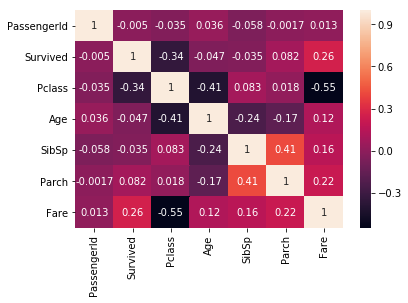

In [21]:
sns.heatmap(train.corr(),annot=True)

In [27]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [48]:
gender = pd.get_dummies(train['Sex'],drop_first=True)

In [50]:
gender['male'].unique()

array([1, 0], dtype=uint64)

In [54]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [58]:
em = pd.get_dummies(train['Embarked'],drop_first=True)

In [59]:
em.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [91]:
train.drop(['Name','Sex','Ticket','Embarked'], axis = 1, inplace=True)

KeyError: "['Name' 'Sex' 'Ticket' 'Embarked'] not found in axis"

In [127]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [62]:
train = pd.concat([train,gender,em],axis=1)

In [128]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [129]:
from sklearn.model_selection import train_test_split

In [149]:
test = train
type(test)

pandas.core.frame.DataFrame

In [165]:
x= test.drop(axis=1,columns=['Survived'])
y = test['Survived']
x

PassengerId  Pclass   Age  SibSp  Parch      Fare  male  Q  S
0              1       3  22.0      1      0    7.2500     1  0  1
1              2       1  38.0      1      0   71.2833     0  0  0
2              3       3  26.0      0      0    7.9250     0  0  1
3              4       1  35.0      1      0   53.1000     0  0  1
4              5       3  35.0      0      0    8.0500     1  0  1
5              6       3  24.0      0      0    8.4583     1  1  0
6              7       1  54.0      0      0   51.8625     1  0  1
7              8       3   2.0      3      1   21.0750     1  0  1
8              9       3  27.0      0      2   11.1333     0  0  1
9             10       2  14.0      1      0   30.0708     0  0  0
10            11       3   4.0      1      1   16.7000     0  0  1
11            12       1  58.0      0      0   26.5500     0  0  1
12            13       3  20.0      0      0    8.0500     1  0  1
13            14       3  39.0      1      5   31.2750     1  0  1
14            15       3  14.0      0      0    7.8542     0  0  1
15            16       2  55.0      0      0   16.0000     0  0  1
16            17       3   2.0      4      1   29.1250     1  1  0
17            18       2  29.0      0      0   13.0000     1  0  1
18            19       3  31.0      1      0   18.0000     0  0  1
19            20       3  24.0      0      0    7.2250     0  0  0
20            21       2  35.0      0      0   26.0000     1  0  1
21            22       2  34.0      0      0   13.0000     1  0  1
22            23       3  15.0      0      0    8.0292     0  1  0
23            24       1  28.0      0      0   35.5000     1  0  1
24            25       3   8.0      3      1   21.0750     0  0  1
25            26       3  38.0      1      5   31.3875     0  0  1
26            27       3  24.0      0      0    7.2250     1  0  0
27            28       1  19.0      3      2  263.0000     1  0  1
28            29       3  24.0      0      0    7.8792     0  1  0
29            30       3  24.0      0      0    7.8958     1  0  1
..           ...     ...   ...    ...    ...       ...   ... .. ..
861          862       2  21.0      1      0   11.5000     1  0  1
862          863       1  48.0      0      0   25.9292     0  0  1
863          864       3  24.0      8      2   69.5500     0  0  1
864          865       2  24.0      0      0   13.0000     1  0  1
865          866       2  42.0      0      0   13.0000     0  0  1
866          867       2  27.0      1      0   13.8583     0  0  0
867          868       1  31.0      0      0   50.4958     1  0  1
868          869       3  24.0      0      0    9.5000     1  0  1
869          870       3   4.0      1      1   11.1333     1  0  1
870          871       3  26.0      0      0    7.8958     1  0  1
871          872       1  47.0      1      1   52.5542     0  0  1
872          873       1  33.0      0      0    5.0000     1  0  1
873          874       3  47.0      0      0    9.0000     1  0  1
874          875       2  28.0      1      0   24.0000     0  0  0
875          876       3  15.0      0      0    7.2250     0  0  0
876          877       3  20.0      0      0    9.8458     1  0  1
877          878       3  19.0      0      0    7.8958     1  0  1
878          879       3  24.0      0      0    7.8958     1  0  1
879          880       1  56.0      0      1   83.1583     0  0  0
880          881       2  25.0      0      1   26.0000     0  0  1
881          882       3  33.0      0      0    7.8958     1  0  1
882          883       3  22.0      0      0   10.5167     0  0  1
883          884       2  28.0      0      0   10.5000     1  0  1
884          885       3  25.0      0      0    7.0500     1  0  1
885          886       3  39.0      0      5   29.1250     0  1  0
886          887       2  27.0      0      0   13.0000     1  0  1
887          888       1  19.0      0      0   30.0000     0  0  1
888          889       3  24.0      1      2   23.45

In [198]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [199]:
from sklearn.linear_model import LogisticRegression

In [200]:
logmodel = LogisticRegression()

In [201]:
logmodel.fit(X_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [202]:
y_pred = logmodel.predict(x_test)

In [203]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [204]:
from sklearn.metrics import confusion_matrix

In [205]:
print(confusion_matrix(y_test,y_pred))

[[92 62]
 [75 39]]
